<a href="https://colab.research.google.com/github/formroller/ML_clone/blob/master/kaggle/Santander/SantanderPrediction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [SantanderPrediction](https://www.kaggle.com/gpreda/santander-eda-and-prediction#Data-exploration)

고객 만족도는 고객의 이탈 여부를 결정하는 척도가 된다. 현재 커널에서는 수백개의 익명화된 변수들을 사용해 은행 업무를 처리하는 동안 서비스 만족도가 낮은 고객 예측을 목적으로한다. 

커널 평가는 예측값과 관찰값 사이의 ROC curver 아래 영역을 기준으로 한다. 


(커널3회-흐름을 보기위해 필사중.이해 안 가는 부분-플롯)
* 각 플롯에서 얻을 수 있는 정보는? (행/열 별 플롯)
 - 플롯을 사용하면 데이터의 분포에 대한 통찰력을 얻을 수 있으며, 데이터의 다양한 추가 특성을 의미할 수 있다.  
 또한 train/test 데이터가 분포 측면에서 어떻게 다른지 확인하는 것이 중요하다. 이것이 모형의 검정 데이터에서 제대로 작동하지 않는 이유일 수 있다.
 > 커널 comment中

# 목차
1. Introduction

2. Prepare for data analysis  
 * 2.1 Load Package

3. Data Exploration  
 * 3.1 Check the data  
    * 3.1.1 결측치와 데이터 타입 확인  
 * 3.2 Density plots of features  
    * 3.2.1 train set  
    * 3.2.2 train/test set  
 * 3.3 Distribution of mean and std  
    * 3.3.1 행/열 평균 분포
    * 3.3.2 행/열 표준편차
    * 3.3.3 행/열 최솟값
    * 3.3.4 행/열 최댓값
    * 3.3.5 Target 행/열 최솟값
    * 3.3.6 Target 행/열 최댓값
 * 3.4 Distribution of Skew and kurtosis
    * 3.4.1 Skewness
    * 3.4.2 Kurtosis
    * 3.4.3 Target값 왜도 분포
    * 3.4.5 Target값 첨도 분포
 * 3.5 Feature Correlation
 * 3.6 Duplitcate values

4. Feature Engineering

5. Model
 * 5.1 일부 변수 제거
 * 5.2 모델 하이퍼파라미터 정의
 * 5.3 모델링
 * 5.4 Feature Importance

6. Submission

7. References


# 1.Introduction
---
이 챌린지에서 Santander 은행은 Kaggler에게 거래 금액에 관계없이 미래 특정한 거래를 진행할 고객을 식별 할 수 있도록 도움을 요청한다.  

대회를 위해 제공된 데이터는 이 문제를 해결하기 위해 사용할 수 있는 실제 데이터와 동일한 구조를 지닌다. 데이터는 익명화되어 각 행에는 숫자로 식별된 200개의 숫자 값이 포함된다.

다음에서는
1. 데이터 탐색
2. 모델을 위한 준비
3. 모델 훈련
4. 테스트 세트의 목표 값 예측
5. 제출 준비  

과정을 수행한다.

# Prepare for data analysis


## 2.1

In [1]:
import os
os.chdir('/content/drive/MyDrive/kaggle/Santander')

import gc #??
import logging #??
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb

from tqdm import tqdm_notebook #??
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import  roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings('ignore')

In [21]:
# plot 한글 깨짐 방지
!sudo apt-get install -y fornts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package fornts-nanum
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
%%time
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

CPU times: user 12.4 s, sys: 983 ms, total: 13.4 s
Wall time: 14.5 s


# 3.Data Exploration

## 3.1 Check the data

In [4]:
train.shape, test.shape

((200000, 202), (200000, 201))

train, test의 행은 200,000개의 행과 202개, 201개의 열로 구성되어 있다.

In [5]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


train set이 포함한 자료
* ID_code(string)
* target
* 200개의 수치형 변수(var_0 : var_199)

test set이 포함한 자료
* ID_code(string)
* 200개의 수치형 변수(var_0 : var_199)

### 3.1.1 결측치와 데이터 타입 확인

In [7]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    
    tt['Type'] = type
    return(np.transpose(tt))

In [8]:
missing_data(train)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Type,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,...,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>


In [9]:
missing_data(test)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Type,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,...,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>


데이터 셋에는 결측값이 없는 것을 알 수 있다. 다음은 수치형 변수를 확인한다. 

In [10]:
%%time
train.describe()

CPU times: user 1.8 s, sys: 130 ms, total: 1.93 s
Wall time: 1.93 s


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

In [11]:
%%time
test.describe()

CPU times: user 1.81 s, sys: 13.1 ms, total: 1.83 s
Wall time: 1.83 s


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,0.371335,-3.268551,14.022662,8.540872,7.532703,14.573704,9.321669,-5.70445,15.265776,12.456675,13.298428,17.230598,4.299010,3.019707,10.567479,13.666970,-3.983721,-1.129536,5.530656,5.047247,-7.687695,10.404920,-0.524830,14.762686,11.434861,3.870130,2.213288,5.875048,10.647806,0.672667,...,24.146181,5.635300,5.360975,11.026376,-2.857328,19.320760,2.962821,-4.189133,4.930356,5.633716,-0.020824,-0.805148,19.779528,-0.666240,20.264135,11.635715,-2.776134,11.864538,-0.949318,2.582604,-2.722636,10.080827,0.651432,8.768929,12.719302,-3.963045,8.978800,-10.291919,15.366094,0.755673,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,5.508661,5.961443,0.190071,4.628712,2.255257,0.411592,2.544860,6.74646,7.846983,7.989812,5.884245,8.199877,2.844023,0.527951,3.771047,0.285454,5.945853,1.524765,0.785618,2.610078,7.971581,2.156324,2.588700,4.325727,0.541040,5.170614,3.120685,2.257235,4.260820,4.078592,...,10.876184,0.217936,1.426064,5.268894,5.457937,5.039303,0.370668,7.827428,3.086443,0.365750,4.417876,5.378492,8.678024,5.987419,7.141816,2.884821,7.557001,2.626556,8.570314,2.803890,5.225554,1.369546,8.961936,4.464461,9.316889,4.724641,3.206635,11.562352,3.929227,0.976123,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,-22.672400,-25.811800,13.424500,-4.741300,0.670300,13.203400,0.314300,-28.90690,-11.324200,-12.699400,-2.634600,-9.940600,-5.164000,1.390600,-0.731300,12.749600,-24.536100,-6.040900,2.842500,-4.421500,-34.054800,1.309200,-8.209000,1.691100,9.776400,-16.923800,-10.466800,-0.885100,-5.368300,-14.083700,...,-8.925700,4.910600,0.106200,-6.093700,-21.514000,3.667300,1.813100,-37.176400,-5.405700,4.291500,-15.593200,-20.393600,-11.796600,-21.342800,-2.485400,2.951200,-29.838400,5.025300,-29.118500,-7.767400,-20.610600,5.346000,-28.092800,-5.476800,-17.011400,-22.467000,-2.303800,-47.306400,4.429100,-2.511500,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.91190

위를 통해 관찰할 수 있는 것은 다음과 같다.
* train / test 표준편차는 비교적 크다.
* train / test 모두 최솟값, 최댓값, 평균, 분산이 꽤 유사해 보인다.
* 평균값의 범위가 넓게 분포해 있다.

train과 test set 수는 동일하며, 이 데이터들에 대해 몇가지 변수로 산포도를 그려본다.

In [12]:
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show();

전체 중 5% 데이터만 표시  
(X축=train data, y축=test)

<Figure size 432x288 with 0 Axes>

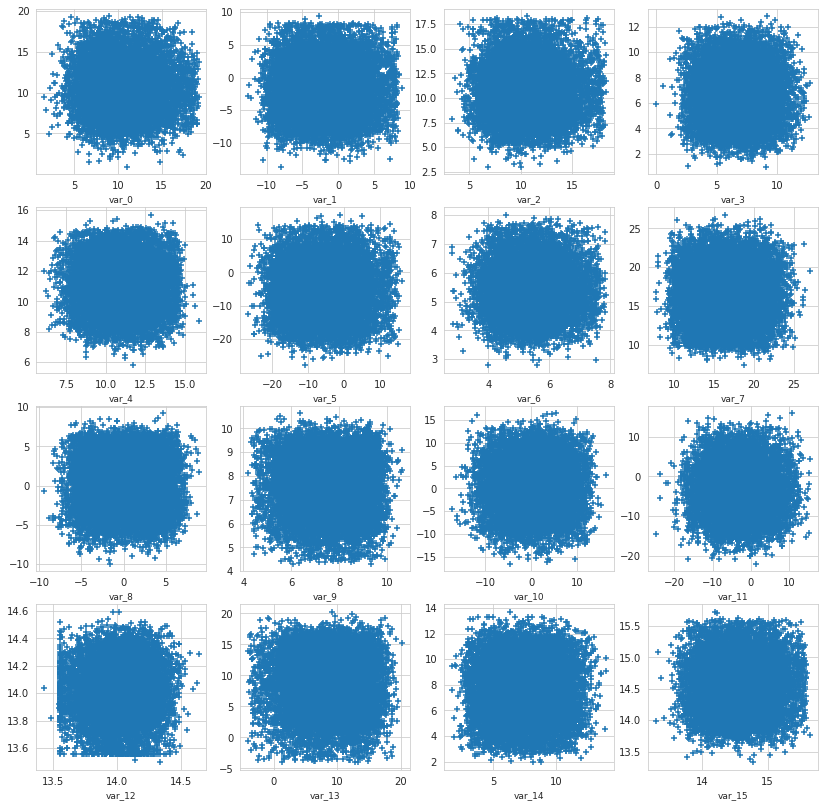

In [13]:
features = []
for i in range(0,16):
    features.append('var_'+str(i))

plot_feature_scatter(train[::20], test[::20], features)

**Train**의 **Target**변수 분포를 확인해본다.

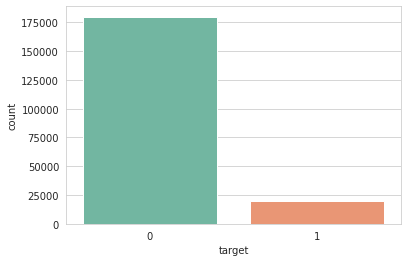

In [14]:
sns.countplot(train['target'], palette='Set2')

In [15]:
print(f"There are {(100*train['target'].value_counts()[1]/train.shape[0]):.3f} target values with 1")

There are 10.049 target values with 1


## 3.2 Density plots of features
train 데이터 세트에 있는 Density plot(밀도그림)을 확인해보자.  
목표값의 0과 1인 값의 분포를 다른 색으로 나타낸다. 

In [16]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10, 10, figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10, 10, i)
        sns.distplot(df1[feature], hist=False, label=label1)
        sns.distplot(df2[feature], hist=False, label=label2)
        plt.xlabel(feature, fontsize=9)
        loc, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

### 3.2.1 train set
처음 100개 값 출력 (2-102)

<Figure size 432x288 with 0 Axes>

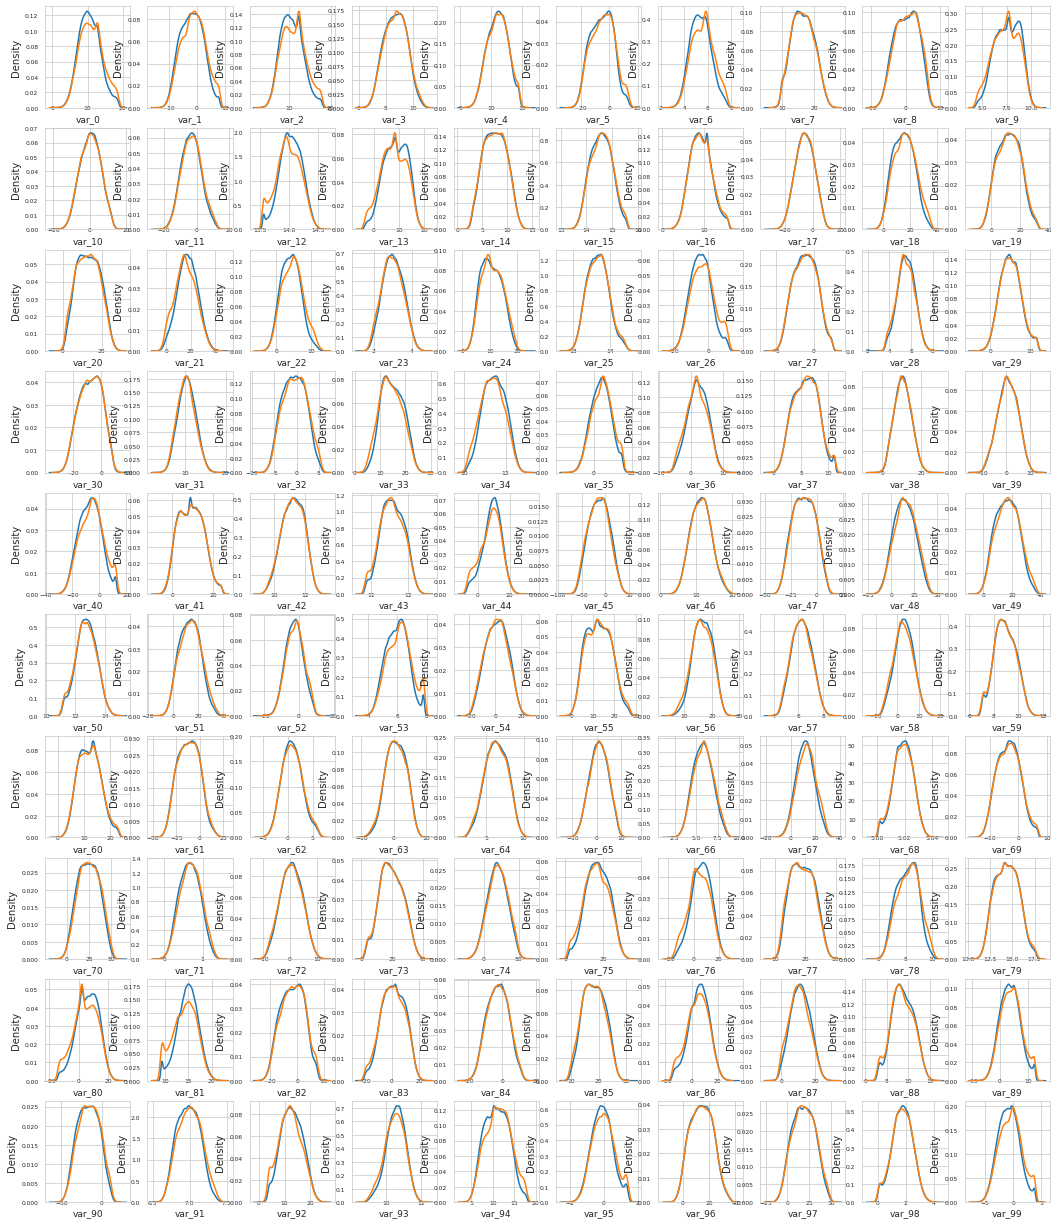

In [17]:
t0 = train.loc[train['target']==0]
t1 = train.loc[train['target']==1]

features=train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

다음 100개의 값 출력 (102-202)

<Figure size 432x288 with 0 Axes>

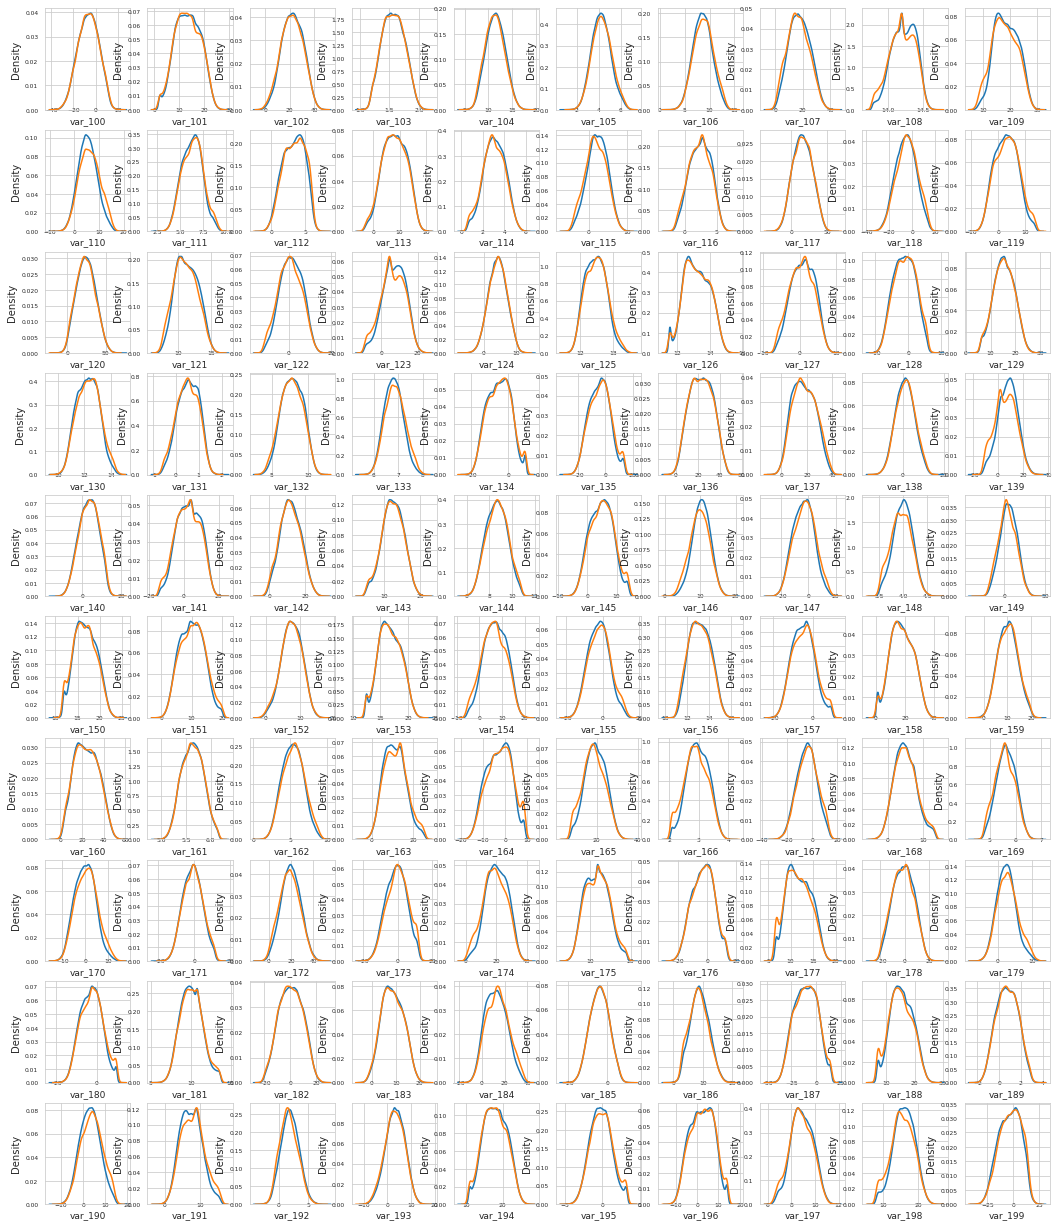

In [18]:
features=train.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

위에서 관찰할 수 있는 것은 다음과 같다. 
* 두 Target값이 다른 분포를 갖는 상당한 수의 변수들이 있음을 알 수 있다.   
    (var_0, var_1, var_2, var_5, var_9, var_13, var_106, var_109, var_139 등)

* 일부 변수들은 이변량 분포로 resamble되는 분포를 보여준다.
    (var_2, var_13, var_26, var_55, var_175, var_184, var_196 등)

향후 예측 모델의 변수 선정 시 이 점을 고려해야 한다.                                    

### 3.2.2 train / test set

train / test target 첫 변수 100개 표시 (2:102)


<Figure size 432x288 with 0 Axes>

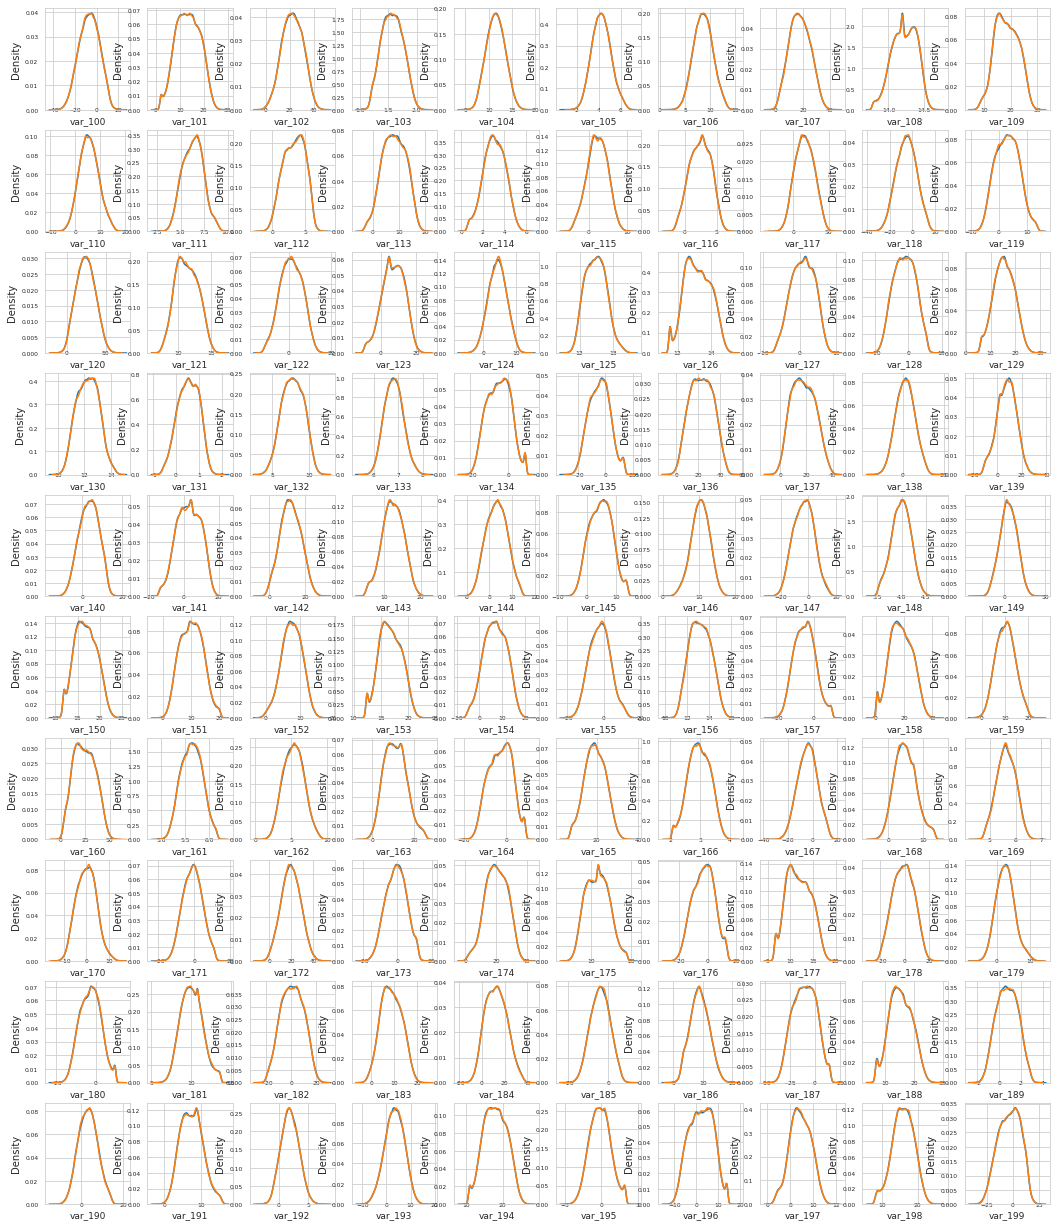

In [19]:
feature = train.columns.values[2:102]
plot_feature_distribution(train, test, 'train', 'test', features)

train / tset target 다음 변수 100개 표시 (102 : 202)

In [ ]:
features = train.columns.values[102:202]
plot_feature_distribution(train, test, 'train','test', features)

위를 통해 train / test set은 수치형 변수의 분포가 균형적인 것을 볼 수 있다.

## 3.3 Distribution of mean and std

### 3.3.1 행/열 별 평균 분포

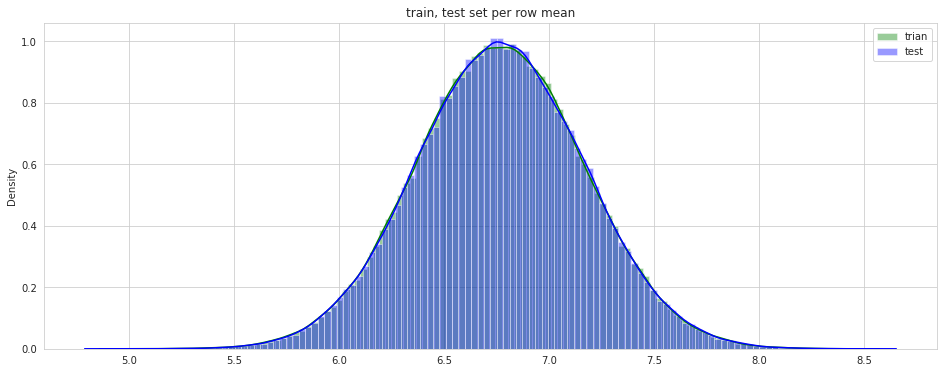

In [24]:
# 행
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]

plt.title('train, test set per row mean distribution')
sns.distplot(train[features].mean(axis=1), color='green', kde=True, bins=120, label='trian')
sns.distplot(test[features].mean(axis=1), color='blue', kde=True, bins=120, label='test')

plt.legend()
plt.show()

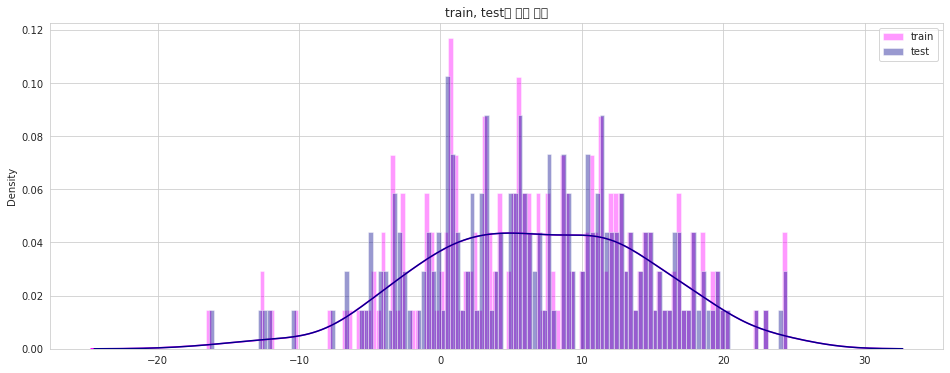

In [25]:
# 열
plt.figure(figsize=(16,6))
plt.title('train, test per mean distribution')

sns.distplot(train[features].mean(axis=0), color='magenta', kde=True, bins=120, label='train')
sns.distplot(test[features].mean(axis=0), color='darkblue', kde=True, bins=120, label='test')

plt.legend()
plt.show()

### 3.3.2 행/열 표준편차 분포

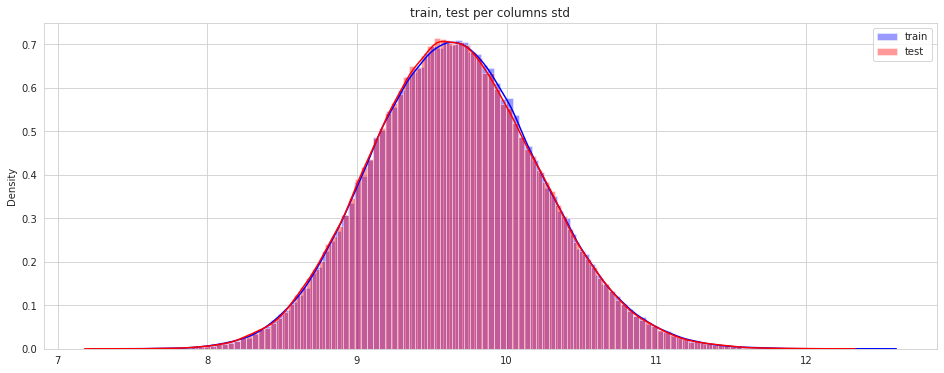

In [28]:
# 행
plt.figure(figsize=(16,6))
plt.title('train, test per columns std')

sns.distplot(train[features].std(axis=1), color='blue', kde=True, bins=120, label='train')
sns.distplot(test[features].std(axis=1), color='red', kde=True, bins=120, label='test')

plt.legend()
plt.show()

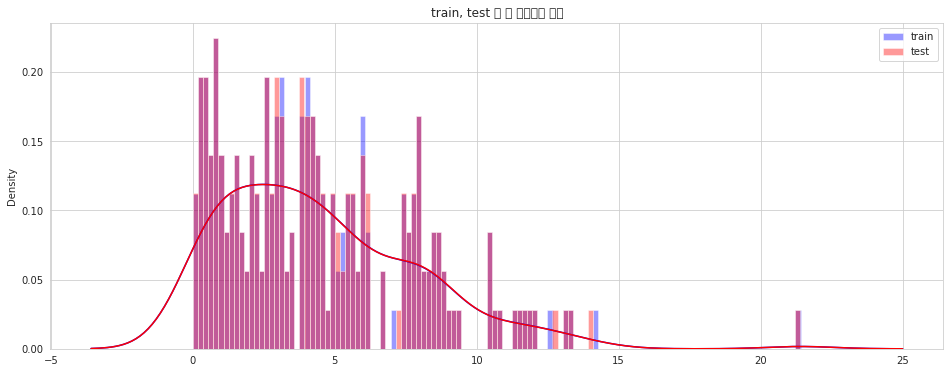

In [31]:
# 열
plt.figure(figsize=(16,6))
plt.title('train, test 열 별 표준편차 분포')

features=train.columns.values[2:202]
sns.distplot(train[features].std(axis=0), color='blue', kde=True, bins=120, label='train')
sns.distplot(test[features].std(axis=0), color='red', kde=True, bins=120, label='test')

plt.legend()
plt.show()

### 3.3.3 행/열 최솟값

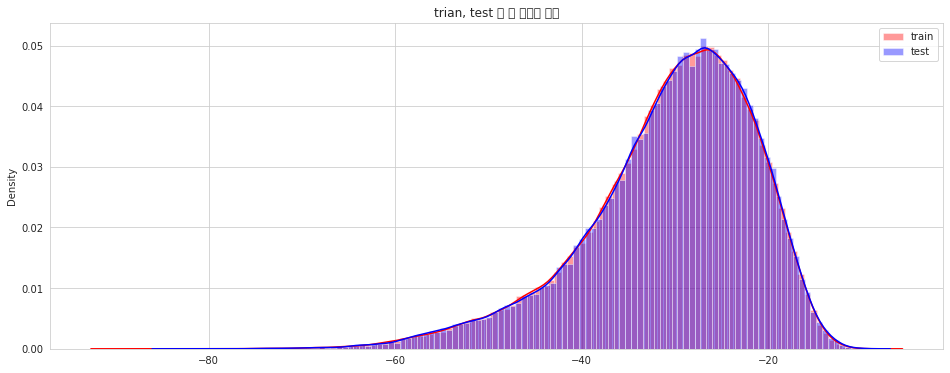

In [32]:
# 행
plt.figure(figsize=(16,6))
plt.title('trian, test 행 별 최솟값 분포')

features = train.columns.values[2:202]
sns.distplot(train[features].min(axis=1), color='red', kde=True, bins=120, label='train')
sns.distplot(test[features].min(axis=1), color='blue', kde=True, bins=120, label='test')

plt.legend()
plt.show()

train/test 세트 모두 낮은 값부터 길게 분포되어 있으며 test의 경우 -80까지 길게 늘어져 잇는 것을 볼 수 있다.

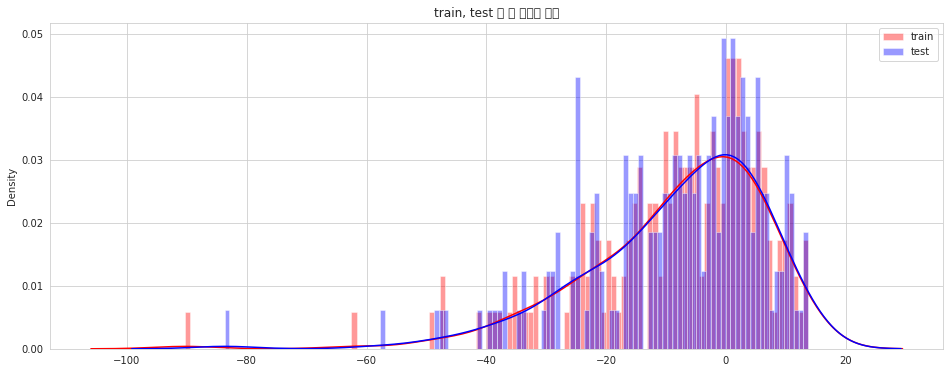

In [35]:
# 열
plt.figure(figsize=(16,6))
plt.title('train, test 열 별 최솟값 분포')

features = train.columns.values[2:202]
sns.distplot(train[features].min(axis=0), color='red', kde=True, bins=120, label='train')
sns.distplot(test[features].min(axis=0), color='blue', kde=True, bins=120, label='test')

plt.legend()
plt.show()

### 3.3.4 행/열 최댓값

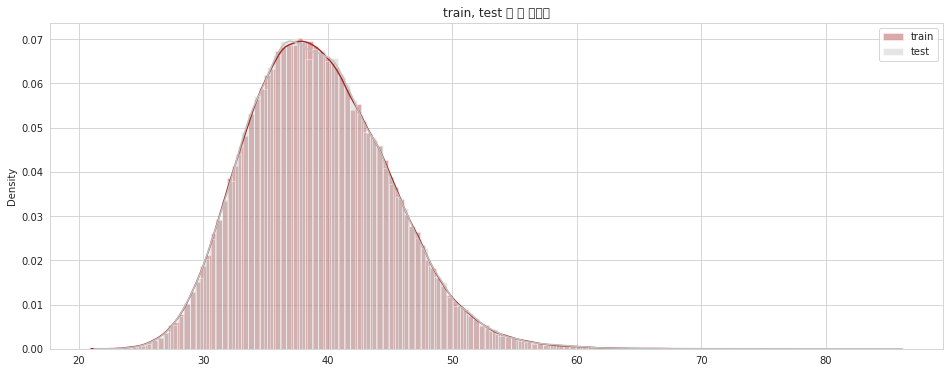

In [37]:
# 행
plt.figure(figsize=(16,6))
plt.title('train, test 행 별 최댓값')

features = train.columns.values[2:202]
sns.distplot(train[features].max(axis=1), color='brown', kde=True, bins=120, label='train')
sns.distplot(test[features].max(axis=1), color='silver', kde=True, bins=120, label='test')

plt.legend()
plt.show()

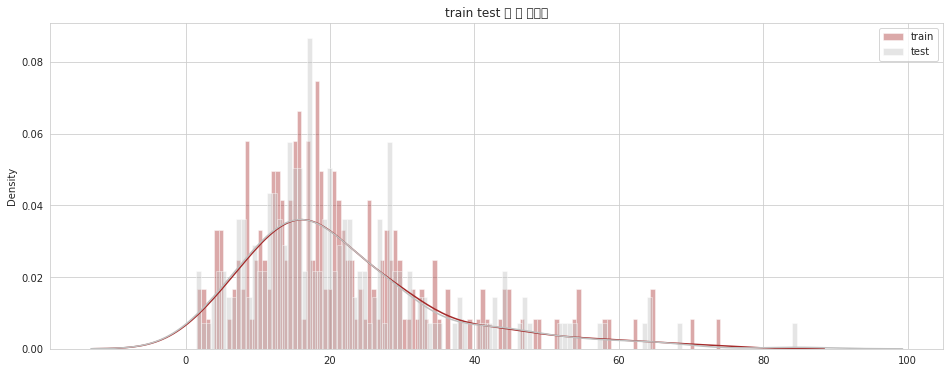

In [40]:
# 열
plt.figure(figsize=(16,6))
plt.title('train test 열 별 최댓값')

features = train.columns.values[2:202]
sns.distplot(train[features].max(axis=0), color='brown', kde=True, bins=120, label='train')
sns.distplot(test[features].max(axis=0), color='silver', kde=True, bins=120, label='test')
plt.legend()
plt.show()

### 3.3.5 Target변수 행/열 최솟값

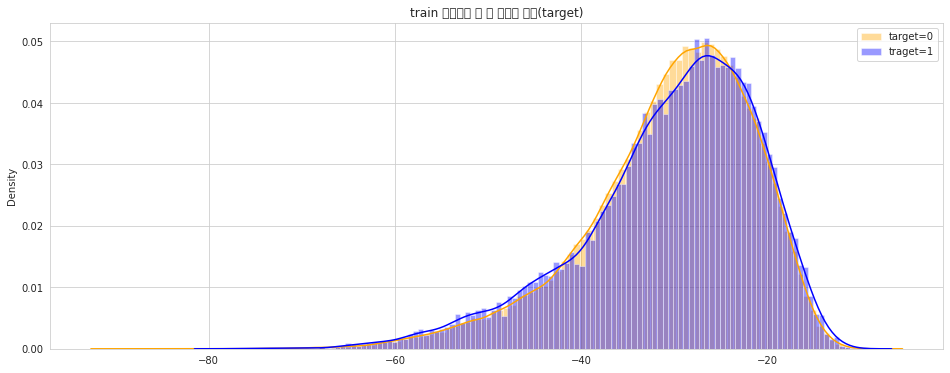

In [41]:
# 행
t0=train.loc[train['target']==0]
t1=train.loc[train['target']==1]

plt.figure(figsize=(16,6))
plt.title('train 데이터의 행 별 최솟값 분포(target)')

sns.distplot(t0[features].min(axis=1), color='orange', kde=True, bins=120, label='target=0')
sns.distplot(t1[features].min(axis=1), color='blue', kde=True, bins=120, label='traget=1')
plt.legend()
plt.show()

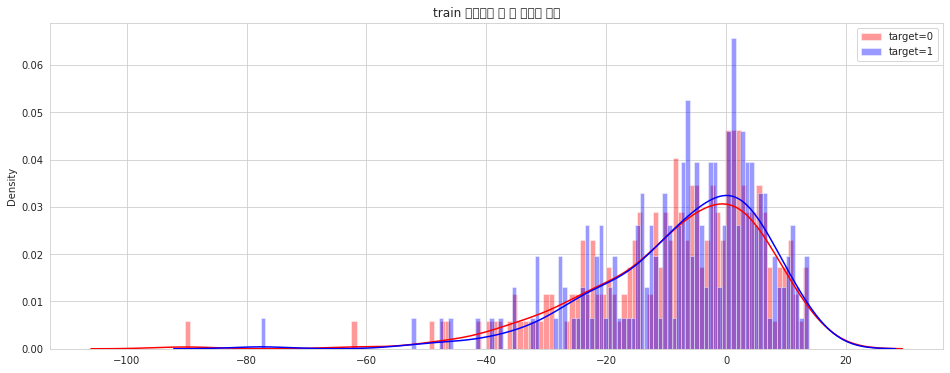

In [44]:
# 열
t0 = train.loc[train['target']==0]
t1 = train.loc[train['target']==1]

plt.figure(figsize=(16,6))
plt.title('train 데이터의 열 별 최솟값 분포')
sns.distplot(t0[features].min(axis=0), color='red', kde=True, bins=120, label='target=0')
sns.distplot(t1[features].min(axis=0), color='blue', kde=True, bins=120, label='target=1')
plt.legend()
plt.show()

### 3.3.6 Target변수 행/열 최댓값

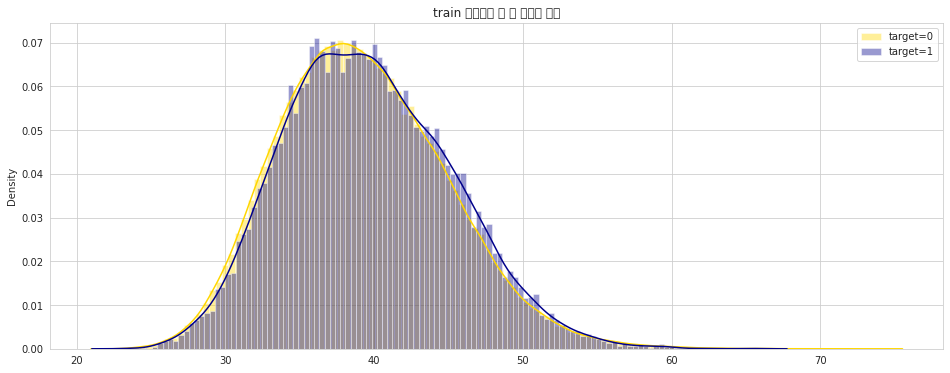

In [47]:
# 행
plt.figure(figsize=(16,6))
plt.title('train 데이터의 행 별 최댓값 분포')

sns.distplot(t0[features].max(axis=1), color='gold', kde=True, bins=120, label='target=0')
sns.distplot(t1[features].max(axis=1), color='darkblue', kde=True, bins=120, label='target=1')
plt.legend()
plt.show()

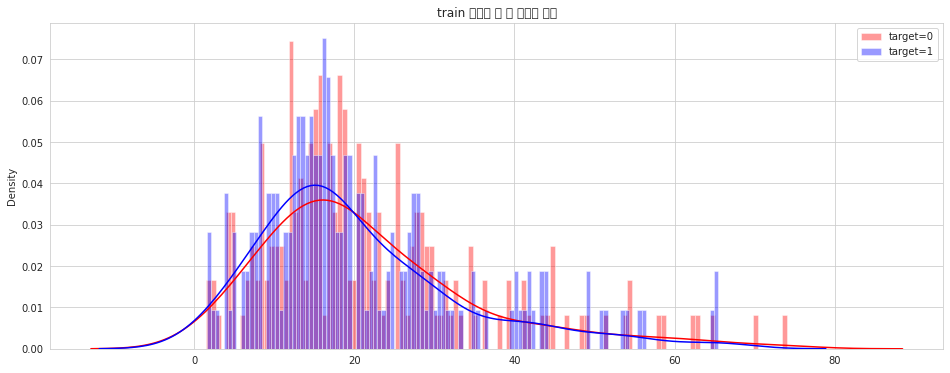

In [48]:
# 열
plt.figure(figsize=(16,6))
plt.title('train 데이터 열 별 최댓값 분포')

sns.distplot(t0[features].max(axis=0), color='red', kde=True, bins=120, label='target=0')
sns.distplot(t1[features].max(axis=0), color='blue', kde=True, bins=120, label='target=1')
plt.legend()
plt.show()

## 3.4 Distribution of Skew and Kurtosis
train, test set의 행/열 별 왜도와 첨도를 알아본다.

### 3.4.1 Skewness

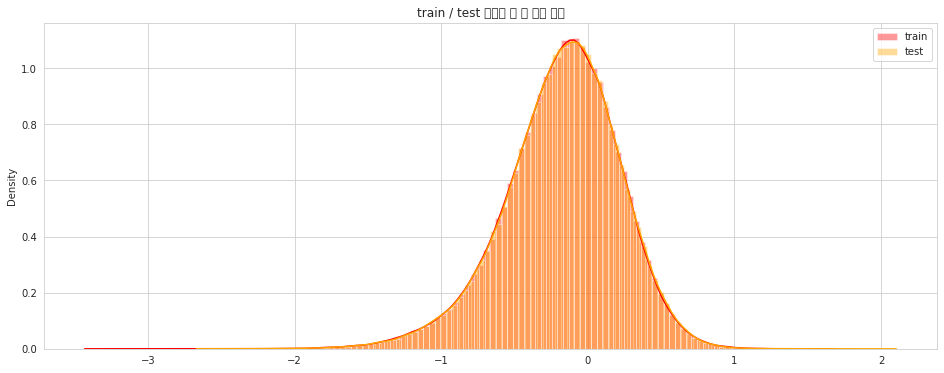

In [52]:
# 행
plt.figure(figsize=(16,6))
plt.title('train / test 데이터 행 별 왜도 분포')

sns.distplot(train[features].skew(axis=1), color='red', kde=True, bins=120, label='train')
sns.distplot(test[features].skew(axis=1), color='orange', kde=True, bins=120, label='test')
plt.legend()
plt.show()

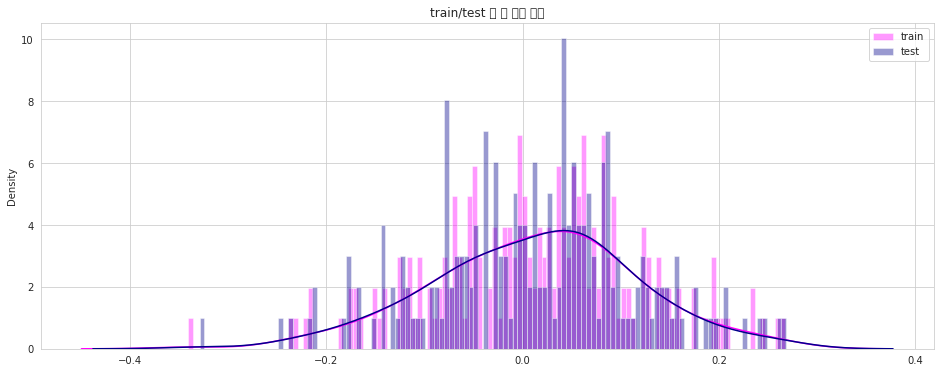

In [53]:
# 열
plt.figure(figsize=(16,6))
plt.title('train/test 열 별 왜도 분포')

sns.distplot(train[features].skew(axis=0), color='magenta', kde=True, bins=120, label='train')
sns.distplot(test[features].skew(axis=0), color='darkblue', kde=True, bins=120, label='test')
plt.legend()
plt.show()

### 3.4.2 Kurtosis

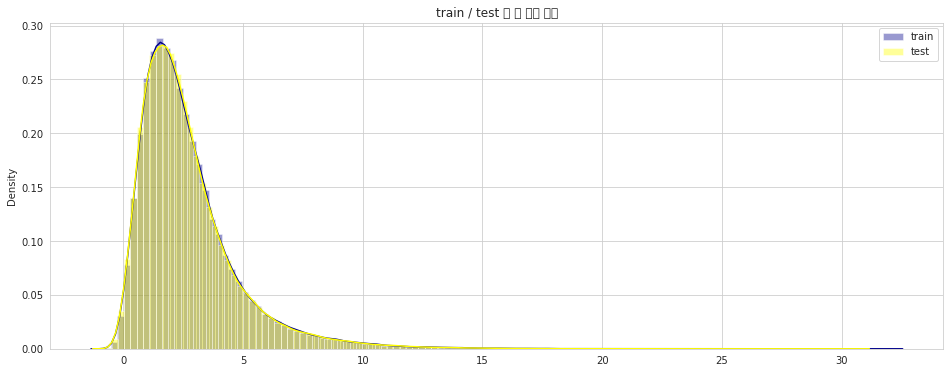

In [55]:
# 행
plt.figure(figsize=(16,6))
plt.title('train / test 행 별 첨도 분포')

sns.distplot(train[feature].kurtosis(axis=1), color='darkblue', kde=True, bins=120, label='train')
sns.distplot(test[feature].kurtosis(axis=1), color='yellow', kde=True, bins=120, label='test')
plt.legend()
plt.show()

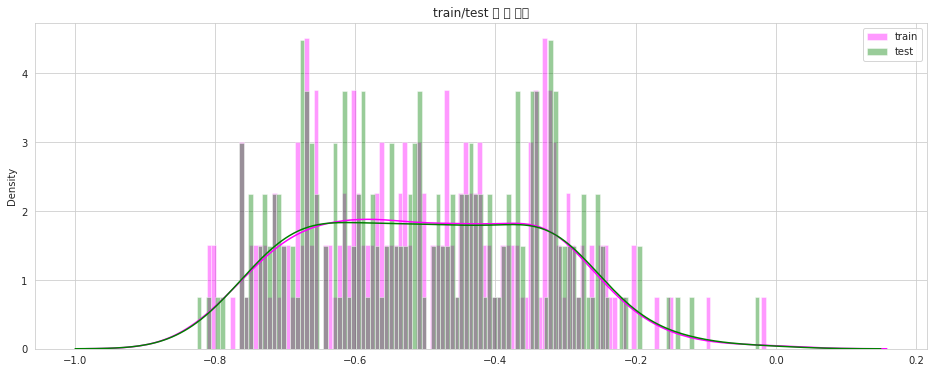

In [58]:
# 열 별 첨도
plt.figure(figsize=(16,6))
plt.title('train/test 열 별 첨도')

sns.distplot(train[features].kurt(axis=0), color='magenta', kde=True, bins=120, label='train')
sns.distplot(test[features].kurt(axis=0), color='green', kde=True, bins=120, label='test')
plt.legend()
plt.show()

### 3.4.3 Target값 왜도 분포

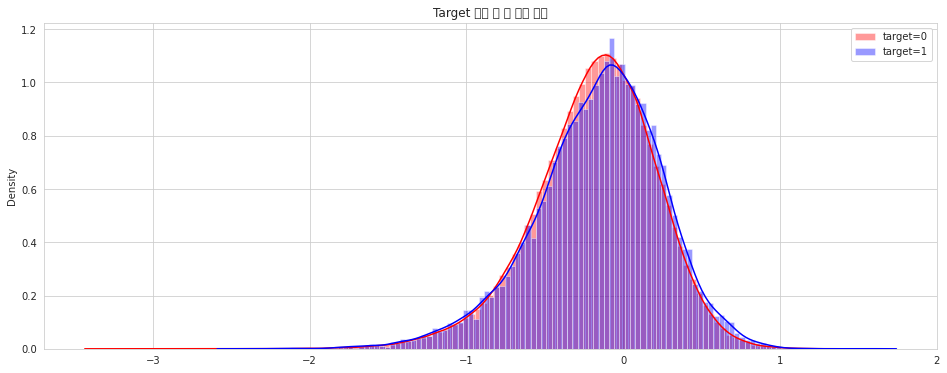

In [59]:
# 행
t0 = train.loc[train['target']==0]
t1 = train.loc[train['target']==1]

plt.figure(figsize=(16,6))
plt.title('Target 값의 행 별 왜도 분포')

sns.distplot(t0[features].skew(axis=1), color='red', kde=True, bins=120, label='target=0')
sns.distplot(t1[features].skew(axis=1), color='blue', kde=True, bins=120, label='target=1')
plt.legend()
plt.show()

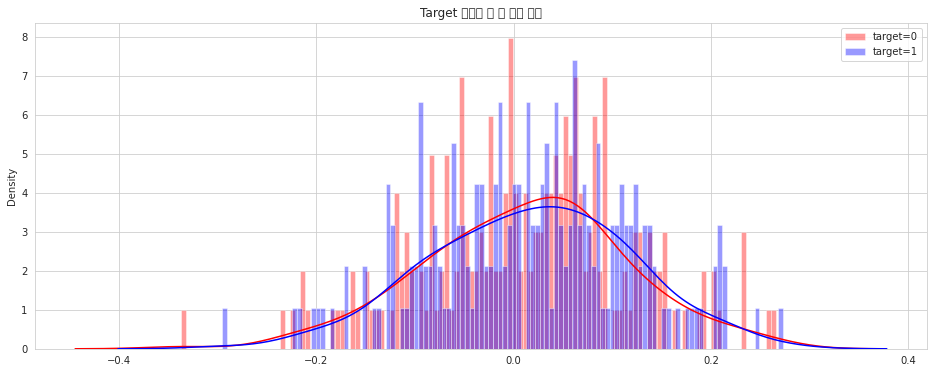

In [62]:
# 열
t0 = train.loc[train['target']==0]
t1 = train.loc[train['target']==1]

plt.figure(figsize=(16,6))
plt.title('Target 변수의 열 별 첨도 분포')

sns.distplot(t0[features].skew(axis=0), color='red', kde=True, bins=120, label='target=0')
sns.distplot(t1[features].skew(axis=0), color='blue', kde=True, bins=120, label='target=1')
plt.legend()
plt.show()

### 3.4.5 Target값 첨도 분포

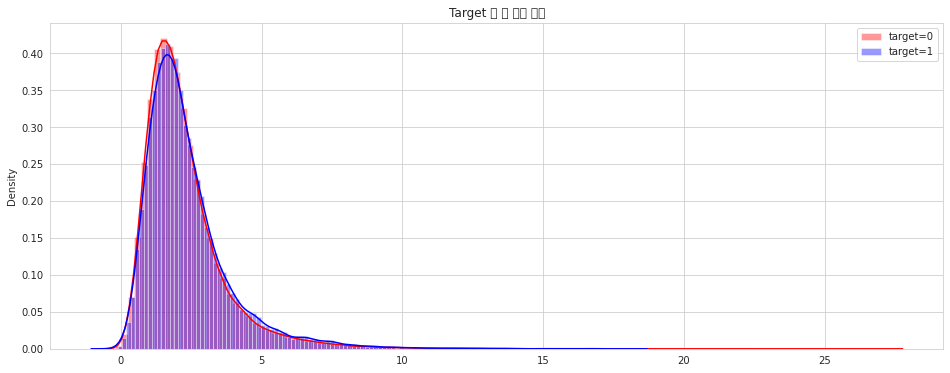

In [64]:
# 행
t0 = train.loc[train['target']==0]
t1 = train.loc[train['target']==1]

plt.figure(figsize=(16,6))
plt.title('Target 행 별 첨도 분포')

sns.distplot(t0[features].kurtosis(axis=1), color='red', kde=True, bins=120, label='target=0')
sns.distplot(t1[features].kurtosis(axis=1), color='blue', kde=True, bins=120, label='target=1')
plt.legend()
plt.show()

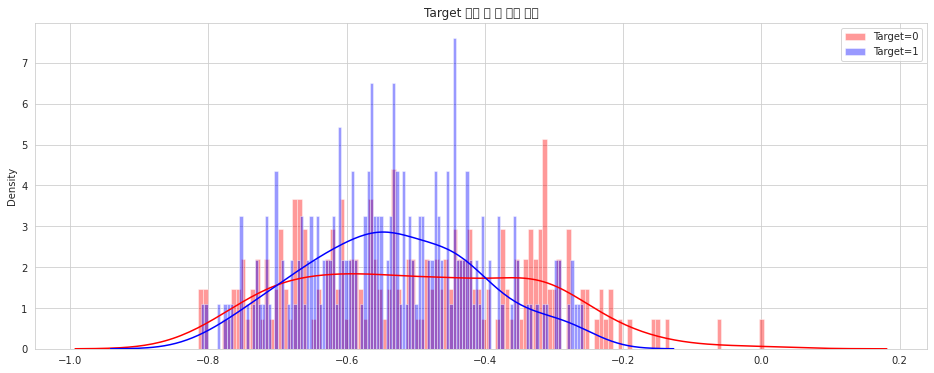

In [68]:
# 열
t0 = train.loc[train['target']==0]
t1 = train.loc[train['target']==1]

plt.figure(figsize=(16,6))
plt.title('Target 변수 열 별 첨도 분포')
sns.distplot(t0[features].kurtosis(axis=0), color='red', kde=True, bins=120, label='Target=0')
sns.distplot(t1[features].kurtosis(axis=0), color='blue', kde=True, bins=120, label='Target=1')
plt.legend()
plt.show()

## 3.5 Feature Correlation
train 변수들 간 상관관계를 계산한다.
하단의 표는 상관관계가 가장 적은 하위 10개의 변수를 보여준다.

In [73]:
%%time
corr = train[features].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
corr = corr[corr['level_0'] != corr['level_1']]

CPU times: user 16.4 s, sys: 14.3 ms, total: 16.4 s
Wall time: 16.3 s


동일한 변수 쌍을 제외하고 가장 상관관계가 높은 변수에 대해 살펴본다.

In [74]:
corr.tail(10) # 상관관계 상위 10개 변수

,level_0,level_1,0
39790,var_183,var_189,0.009359
39791,var_189,var_183,0.009359
39792,var_174,var_81,0.009490
39793,var_81,var_174,0.009490
39794,var_81,var_165,0.009714
39795,var_165,var_81,0.009714
39796,var_53,var_148,0.009788
39797,var_148,var_53,0.009788
39798,var_26,var_139,0.009844
39799,var_139,var_26,0.009844


In [75]:
corr.head(10) # 상관관계 하위 10개 변수

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
5,var_109,var_126,1.313947e-07
6,var_144,var_27,1.772502e-07
7,var_27,var_144,1.772502e-07
8,var_177,var_100,3.116544e-07
9,var_100,var_177,3.116544e-07


## 3.6 Duplicate values
열에 얼마나 많은 중복값이 있는지 확인한다.

In [76]:
features = train.columns.values[2:202]
unique_max_train = []
unique_max_test = []

for feature in features:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])

    values = test[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

In [77]:
np.transpose((pd.DataFrame(unique_max_train,
                           columns=['Feature', 'Max duplicate', 'Value',]).sort_values(by='Max duplicate', ascending=False).head(15)))

,68,108,126,12,91,103,148,71,161,25,125,169,166,133,43
Feature,var_68,var_108,var_126,var_12,var_91,var_103,var_148,var_71,var_161,var_25,var_125,var_169,var_166,var_133,var_43
Max duplicate,1084,313,305,203,66,61,59,54,52,41,40,39,39,39,39
Value,5.0214,14.1999,11.5356,13.5545,6.9785,1.6662,4.0456,0.7031,5.7688,13.6723,12.5159,5.6941,2.7306,6.8632,11.4522


test set에서 중복이 많은 상위 15개 변수 확인

# 4.Feature Engineering
---
기존 변수에 대해 몇가지 집계 시행한다.

In [78]:
%%time
idx = features = train.columns.values[2:202]
for df in [test, train]:
    df['sum'] = df[idx].sum(axis=1)
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurt(axis=1)
    df['med'] = df[idx].median(axis=1)

CPU times: user 8.47 s, sys: 248 ms, total: 8.72 s
Wall time: 8.68 s


새로 생성한 변수 확인.

In [79]:
train[train.columns[202:]].head()

,sum,min,max,mean,std,skew,kurt,med
0,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,1.331023,6.77040
1,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,4.110215,7.22315
2,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,0.546438,5.89940
3,1288.2319,-35.1659,38.1015,6.441159,9.594064,-0.480116,2.630499,6.70260
4,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,9.787399,6.94735


In [80]:
test[test.columns[201:]].head()

,sum,min,max,mean,std,skew,kurt,med
0,1416.6404,-31.9891,42.0248,7.083202,9.910632,-0.088518,1.871262,7.31440
1,1249.6860,-41.1924,35.6020,6.248430,9.541267,-0.559785,3.391068,6.43960
2,1430.2599,-34.3488,39.3654,7.151299,9.967466,-0.135084,2.326901,7.26355
3,1411.4447,-21.4797,40.3383,7.057223,8.257204,-0.167741,2.253054,6.89675
4,1423.7364,-24.8254,45.5510,7.118682,10.043542,0.293484,2.044943,6.83375


In [112]:
def plot_new_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,4, figsize=(18,8))
    
    for feature in features:
        i += 1
        plt.subplot(2,4,i)
        sns.kdeplot(df1[feature], bw=0.5, label=label1)
        sns.kdeplot(df2[feature], bw=0.5, label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, label = plt.xticks()
        
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)

    plt.show()


새로 생성한 변수의 분포를 확인하고 가공한다.  
Target값에 따라(0,1) 그룹화된 새로운 특징의 분포를 그림으로 표시한다. 

<Figure size 432x288 with 0 Axes>

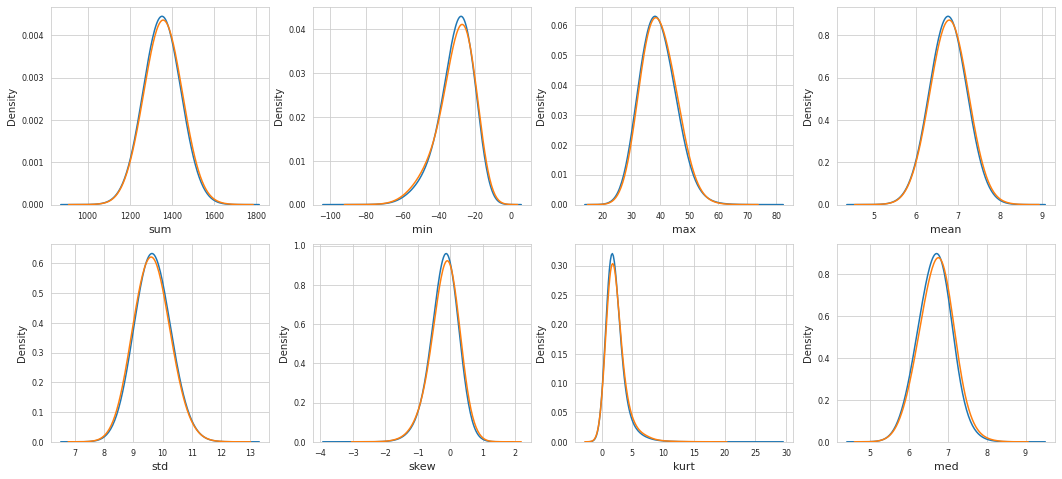

In [113]:
# train - target 기준
t0 = train.loc[train['target']==0]
t2 = train.loc[train['target']==1]

features = train.columns.values[202:]
plot_new_feature_distribution(t0, t2, 'target:0','target:1', features)

train / test의 새로 생성한 변수 분포 확인.

<Figure size 432x288 with 0 Axes>

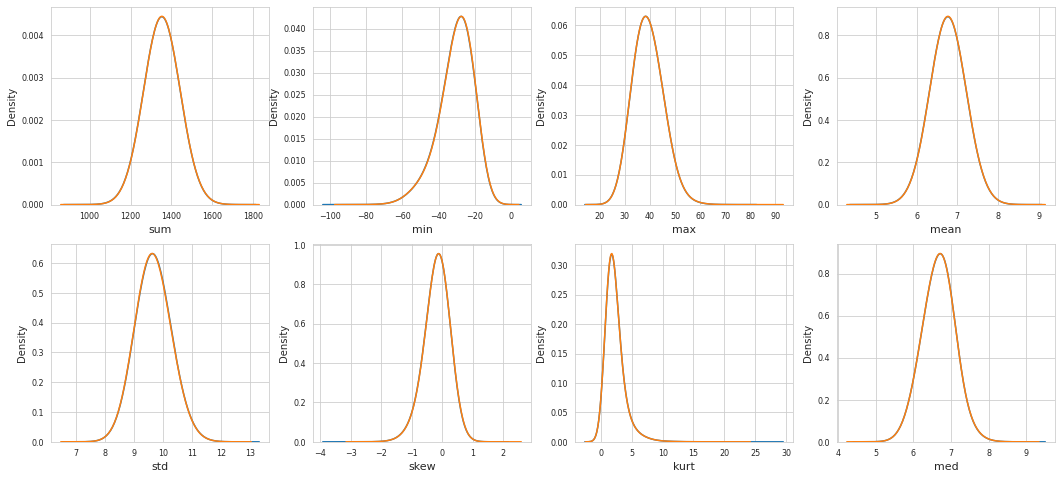

In [114]:
# train / test
features = train.columns.values[202:]
plot_new_feature_distribution(train, test, 'train', 'test', features)

In [ ]:
# 반올림 변수 (사용X)

# features = [c for c in train.columns if c not in ['ID_code','target']]

# for feature in features:
#     train['r2_'+feature] = np.round(train[feature],2)
#     test['r2_'+feature] = np.round(test[feature],2)
#     train['r1_'+feature] = np.round(train[feature],1)
#     test['r1_'+feature] = np.round(test[feature],1)

# # 얼마나 많은 변수르 가지고 있는지 확인해본다.
# print(f"train and test columns : {len(train.columns)} {len(test.columns)}")

위 셀 수행 결과 성능이 저하됨으로 사용하지 않는다. 

반올림에 대한 문의

        [질문]
        Why are we doubling the features of the dataset with just a rounded version of the original value? What is the statistical usefulness of the operation?
        원래 값의 반올림 버전만으로 데이터 세트의 기능을 두 배로 늘리는 이유는 무엇입니까? 이 작업의 통계상 유용성은 무엇입니까?

        [답변]
        Someone had a similar question lower down in the thread (Post by Srikanth), where Gabriel had said that "I tried it as a simple ad-hoc technique to verify if by removing a bit of the precision I get less overfitting."
        가브리엘이 "나는 약간의 정밀도를 제거함으로써 과적합이 덜 되는지 검증하기 위해 간단한 애드혹 기법으로 그것을 시도했다."라고 말한 스리칸스(Post by Srikanth) 아래에 비슷한 질문이 있었다.
        

# 5.Model
---


## 5.1 일부 변수 제거

In [115]:
features = [c for c in train.columns if c not in ['ID_code', 'target']]
target = train['target']

## 5.2 모델 하이퍼파리미터 정의

In [132]:
param = {
    'bagging_freq':5,
    'bagging_fraction':0.4,
    'boost_from_average':'false',
    'boost':'gbdt',
    'feature_fraction':0.05,
    'learning_rate':0.01,
    'max_depth':-1,
    'metric':'auc',
    'min_data_in_leaf':80,
    'min_sum_hessian_in_leaf':10.0,
    'num_leaves':13,
    'num_threads':8,
    'tree_learner':'serial',
    'objective':'binary',
    'verbosity':1
}

## 5.3 모델링

In [137]:
# %%time
# Fold = 5, num_round = 100000

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print(f"Fold {fold_}")
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 100000 #1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets=[trn_data, val_data], verbose_eval=1000, early_stopping_rounds=3000)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration = clf.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df['Feature'] = features
    fold_importance_df['Importacne'] = clf.feature_importance()
    fold_importance_df['fold'] = fold_ + i
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration)/folds.n_splits

print('CV score : {:<8.5}'.format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.901701	valid_1's auc: 0.883556
[2000]	training's auc: 0.913097	valid_1's auc: 0.891667
[3000]	training's auc: 0.920958	valid_1's auc: 0.895798
[4000]	training's auc: 0.927117	valid_1's auc: 0.898189
[5000]	training's auc: 0.93234	valid_1's auc: 0.899554
[6000]	training's auc: 0.936928	valid_1's auc: 0.900308
[7000]	training's auc: 0.941137	valid_1's auc: 0.900689
[8000]	training's auc: 0.94509	valid_1's auc: 0.90087
[9000]	training's auc: 0.94879	valid_1's auc: 0.901047
[10000]	training's auc: 0.95236	valid_1's auc: 0.901073
[11000]	training's auc: 0.955788	valid_1's auc: 0.901051
[12000]	training's auc: 0.958991	valid_1's auc: 0.901011
[13000]	training's auc: 0.962119	valid_1's auc: 0.900971
[14000]	training's auc: 0.965013	valid_1's auc: 0.900819
Early stopping, best iteration is:
[11536]	training's auc: 0.957495	valid_1's auc: 0.901124
Fold 1
Training until validation scores don't improve

## 5.4 Feature Importance

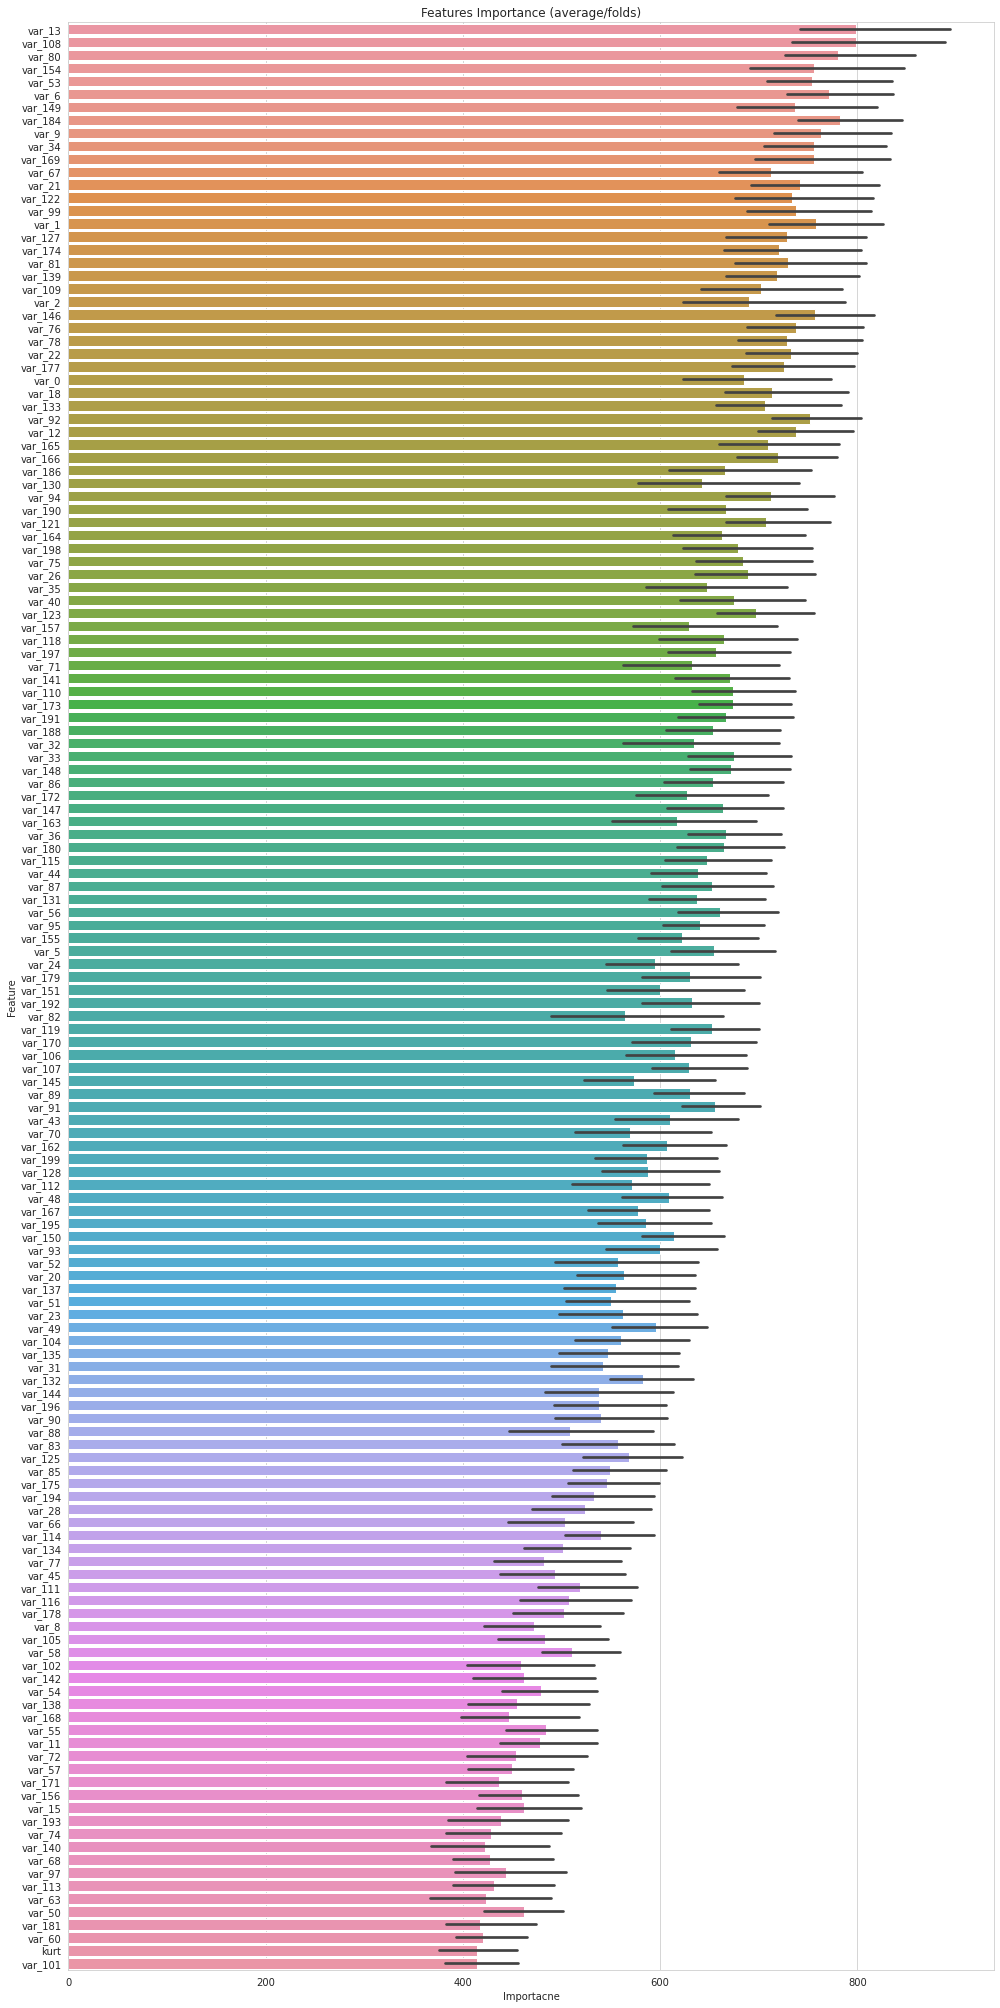

In [146]:
cols = (feature_importance_df[['Feature', 'Importacne']]).groupby('Feature').mean().sort_values(by='Importacne', ascending=False)[:150].index
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x='Importacne', y='Feature', data=best_features.sort_values(by='Importacne', ascending=False))
plt.title('Features Importance (average/folds)')
plt.tight_layout()

# 6.Submission

In [152]:
pd.DataFrame({'ID_code':test['ID_code'].values, 'target':predictions})

,ID_code,target
0,test_0,0.115743
1,test_1,0.202161
2,test_2,0.193983
3,test_3,0.213619
4,test_4,0.041774
...,...,...
199995,test_199995,0.035430
199996,test_199996,0.008356
199997,test_199997,0.004964
199998,test_199998,0.097177
